## デモ用　わかりやすくporoma領域とPorocarcinoma領域よりアノテーションをひとつずつ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap

In [34]:
df = pd.read_csv("./Porocarcinoma_With_Poroma.ndpi (2).txt", sep="\t")

In [35]:
df = df[(df.Parent == "B")|(df.Parent == "E")]

In [36]:
df = df.reset_index(drop=True)

In [37]:
df = df[["Image", "Parent", 'Centroid X µm',
       'Centroid Y µm', 'Nucleus: Area µm^2',
       'Nucleus: Length µm', 'Nucleus: Circularity', 'Nucleus: Max diameter µm', 'Nucleus: Min diameter µm',
       'Hematoxylin: Nucleus: Mean',
       'Hematoxylin: Nucleus: Median', 'Hematoxylin: Nucleus: Min',
       'Hematoxylin: Nucleus: Max', 'Hematoxylin: Nucleus: Std.Dev.',
       'Hematoxylin: Cytoplasm: Mean', 'Hematoxylin: Cytoplasm: Median',
       'Hematoxylin: Cytoplasm: Min', 'Hematoxylin: Cytoplasm: Max',
       'Hematoxylin: Cytoplasm: Std.Dev.', 
       'Hematoxylin: Cell: Mean', 'Hematoxylin: Cell: Median',
       'Hematoxylin: Cell: Min', 'Hematoxylin: Cell: Max',
       'Hematoxylin: Cell: Std.Dev.', 'Eosin: Nucleus: Mean',
       'Eosin: Nucleus: Median', 'Eosin: Nucleus: Min', 'Eosin: Nucleus: Max',
       'Eosin: Nucleus: Std.Dev.', 'Eosin: Cytoplasm: Mean',
       'Eosin: Cytoplasm: Median', 'Eosin: Cytoplasm: Min',
       'Eosin: Cytoplasm: Max', 'Eosin: Cytoplasm: Std.Dev.',
        'Eosin: Cell: Mean', 'Eosin: Cell: Median',
       'Eosin: Cell: Min', 'Eosin: Cell: Max', 'Eosin: Cell: Std.Dev.']]
df.dropna(inplace=True)
X = df.drop(["Image", "Parent", 'Centroid X µm',
       'Centroid Y µm'], axis=1)

In [38]:
df

,Image,Parent,Centroid X µm,Centroid Y µm,Nucleus: Area µm^2,Nucleus: Length µm,Nucleus: Circularity,Nucleus: Max diameter µm,Nucleus: Min diameter µm,Hematoxylin: Nucleus: Mean,...,Eosin: Cytoplasm: Mean,Eosin: Cytoplasm: Median,Eosin: Cytoplasm: Min,Eosin: Cytoplasm: Max,Eosin: Cytoplasm: Std.Dev.,Eosin: Cell: Mean,Eosin: Cell: Median,Eosin: Cell: Min,Eosin: Cell: Max,Eosin: Cell: Std.Dev.
0,Porocarcinoma_With_Poroma.ndpi,B,39887.8,8458.1,12.2889,14.3320,0.7518,5.5980,2.5664,0.5392,...,0.2055,0.2046,0.0689,0.3724,0.0526,0.2057,0.2052,0.0689,0.3724,0.0532
1,Porocarcinoma_With_Poroma.ndpi,B,40046.2,8458.2,13.9754,14.8548,0.7959,5.8447,3.0762,0.7943,...,0.1966,0.1961,0.0840,0.3600,0.0539,0.1796,0.1786,0.0513,0.3600,0.0565
2,Porocarcinoma_With_Poroma.ndpi,B,40029.6,8458.5,14.8673,15.0012,0.8302,5.8326,3.3038,0.5164,...,0.1874,0.1893,0.0499,0.3329,0.0580,0.1902,0.1954,0.0499,0.3329,0.0527
3,Porocarcinoma_With_Poroma.ndpi,B,39979.5,8459.3,26.1584,19.8112,0.8375,7.9052,4.2773,0.5383,...,0.2344,0.2308,0.0588,0.4203,0.0721,0.2221,0.2181,0.0343,0.4203,0.0699
4,Porocarcinoma_With_Poroma.ndpi,B,39908.7,8459.2,22.4397,18.8162,0.7965,7.5423,3.8721,0.5413,...,0.2541,0.2493,0.0962,0.3858,0.0554,0.2400,0.2379,0.0962,0.3990,0.0581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,Porocarcinoma_With_Poroma.ndpi,E,25531.0,13712.2,11.4007,13.4714,0.7894,5.2618,3.5446,0.3465,...,0.1980,0.1837,0.0494,0.4457,0.0960,0.2131,0.2221,0.0494,0.4457,0.0944
12246,Porocarcinoma_With_Poroma.ndpi,E,25656.0,13712.4,13.7647,14.7869,0.7911,5.5916,3.6855,0.5403,...,0.2603,0.2486,0.1526,0.4499,0.0741,0.2696,0.2643,0.0938,0.4499,0.0726
12247,Porocarcinoma_With_Poroma.ndpi,E,25329.6,13712.4,17.6466,16.0900,0.8566,6.2821,3.7178,0.7701,...,0.2283,0.2359,0.0877,0.4217,0.0743,0.2528,0.2505,0.0877,0.5690,0.0886
12248,Porocarcinoma_With_Poroma.ndpi,E,25407.0,13712.6,12.6737,13.4618,0.8788,4.6611,3.5039,1.1278,...,0.0876,0.0767,-0.0121,0.2992,0.0450,0.1583,0.0996,-0.1767,0.7911,0.1667


In [39]:
X

,Nucleus: Area µm^2,Nucleus: Length µm,Nucleus: Circularity,Nucleus: Max diameter µm,Nucleus: Min diameter µm,Hematoxylin: Nucleus: Mean,Hematoxylin: Nucleus: Median,Hematoxylin: Nucleus: Min,Hematoxylin: Nucleus: Max,Hematoxylin: Nucleus: Std.Dev.,...,Eosin: Cytoplasm: Mean,Eosin: Cytoplasm: Median,Eosin: Cytoplasm: Min,Eosin: Cytoplasm: Max,Eosin: Cytoplasm: Std.Dev.,Eosin: Cell: Mean,Eosin: Cell: Median,Eosin: Cell: Min,Eosin: Cell: Max,Eosin: Cell: Std.Dev.
0,12.2889,14.3320,0.7518,5.5980,2.5664,0.5392,0.4900,0.2764,0.9694,0.1967,...,0.2055,0.2046,0.0689,0.3724,0.0526,0.2057,0.2052,0.0689,0.3724,0.0532
1,13.9754,14.8548,0.7959,5.8447,3.0762,0.7943,0.8448,0.0559,1.4852,0.2701,...,0.1966,0.1961,0.0840,0.3600,0.0539,0.1796,0.1786,0.0513,0.3600,0.0565
2,14.8673,15.0012,0.8302,5.8326,3.3038,0.5164,0.5042,0.2152,1.2386,0.1814,...,0.1874,0.1893,0.0499,0.3329,0.0580,0.1902,0.1954,0.0499,0.3329,0.0527
3,26.1584,19.8112,0.8375,7.9052,4.2773,0.5383,0.5175,0.1223,1.0746,0.1714,...,0.2344,0.2308,0.0588,0.4203,0.0721,0.2221,0.2181,0.0343,0.4203,0.0699
4,22.4397,18.8162,0.7965,7.5423,3.8721,0.5413,0.5586,0.1089,0.9941,0.2004,...,0.2541,0.2493,0.0962,0.3858,0.0554,0.2400,0.2379,0.0962,0.3990,0.0581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,11.4007,13.4714,0.7894,5.2618,3.5446,0.3465,0.3356,0.0673,0.5863,0.1292,...,0.1980,0.1837,0.0494,0.4457,0.0960,0.2131,0.2221,0.0494,0.4457,0.0944
12246,13.7647,14.7869,0.7911,5.5916,3.6855,0.5403,0.5360,0.1953,1.1851,0.2678,...,0.2603,0.2486,0.1526,0.4499,0.0741,0.2696,0.2643,0.0938,0.4499,0.0726
12247,17.6466,16.0900,0.8566,6.2821,3.7178,0.7701,0.7435,0.2026,1.4324,0.2924,...,0.2283,0.2359,0.0877,0.4217,0.0743,0.2528,0.2505,0.0877,0.5690,0.0886
12248,12.6737,13.4618,0.8788,4.6611,3.5039,1.1278,1.2797,0.1022,1.8099,0.4468,...,0.0876,0.0767,-0.0121,0.2992,0.0450,0.1583,0.0996,-0.1767,0.7911,0.1667


In [40]:
feature = ['Nucleus: Area µm^2', 'Nucleus: Length µm',
       'Nucleus: Circularity', 'Nucleus: Max diameter µm','Hematoxylin: Nucleus: Median', 'Hematoxylin: Nucleus: Min',
       'Hematoxylin: Nucleus: Max', 
       'Hematoxylin: Cytoplasm: Mean', 'Hematoxylin: Cell: Mean',
       'Hematoxylin: Cell: Median', 
       'Eosin: Nucleus: Mean',  'Eosin: Cell: Mean']

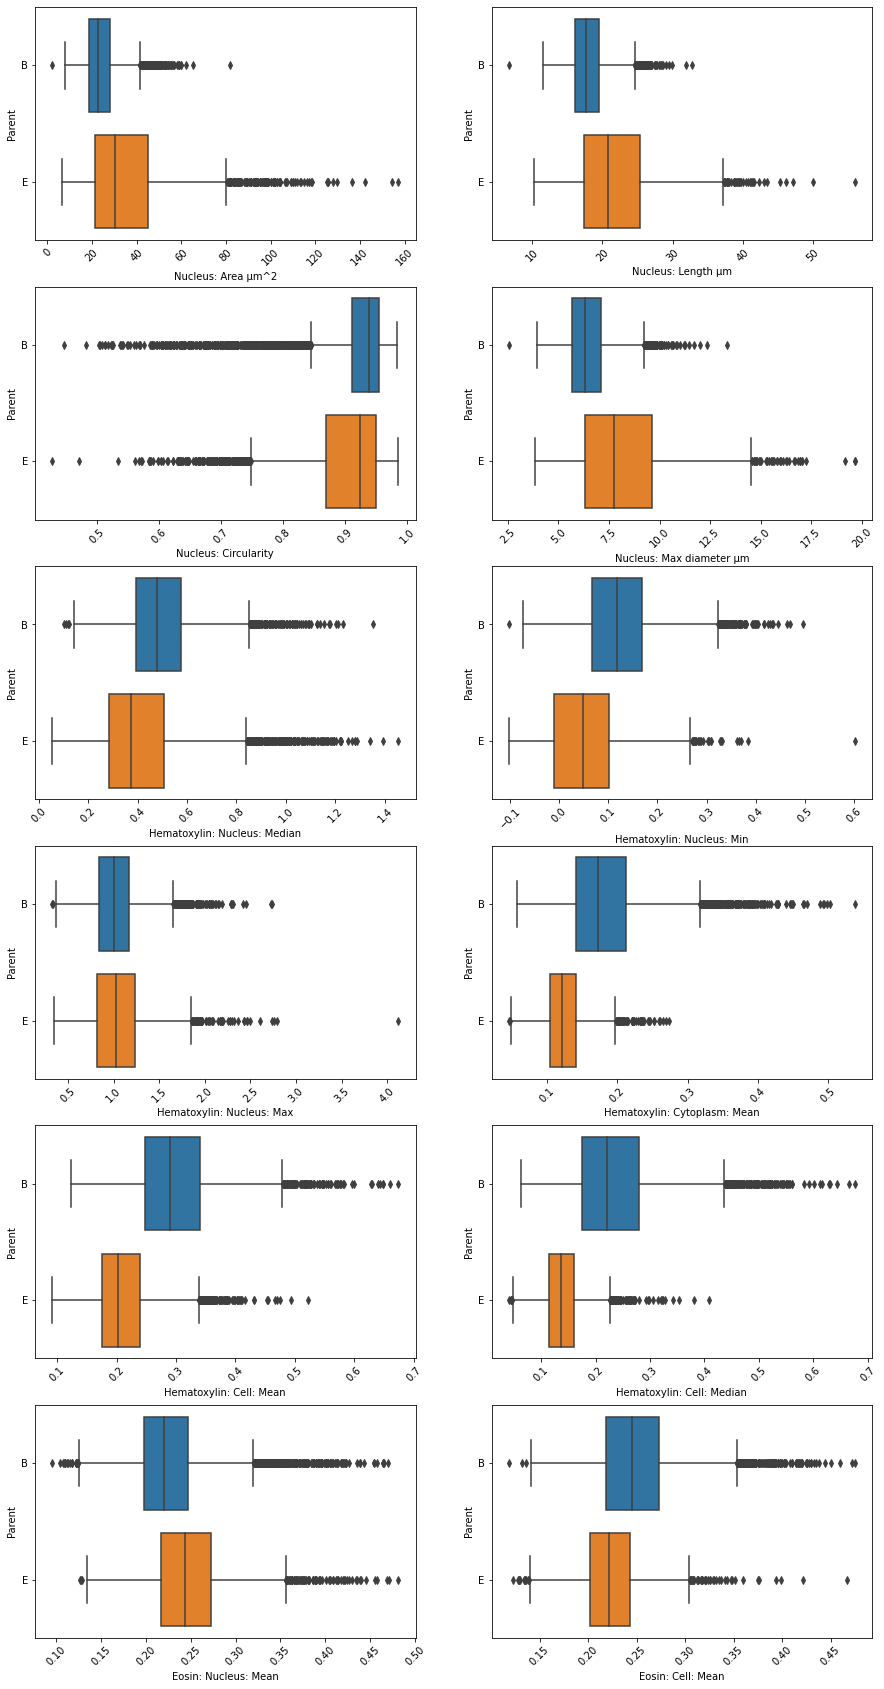

In [41]:
plt.figure(figsize = (15, 30))
for i in enumerate(feature):
    plt.subplot(6, 2, i[0]+1)
    sns.boxplot(x=i[1], y="Parent", data = df)
    plt.xticks(rotation = 45)

In [42]:
Scaler = StandardScaler()
x_std = Scaler.fit_transform(X)

In [43]:
reducer = umap.UMAP()
mapper = reducer.fit(x_std)

In [44]:
embedding = mapper.embedding_
UMAPData = pd.DataFrame(embedding, columns=["x", "y"])
UMAPData["Name"] = df.Parent

In [45]:
UMAPData

,x,y,Name
0,12.950468,1.611848,B
1,11.771288,4.263833,B
2,12.012712,3.794175,B
3,10.280722,3.137529,B
4,11.499642,1.497759,B
...,...,...,...
12245,4.992199,2.833160,E
12246,9.767425,2.727433,E
12247,7.090639,4.198141,E
12248,7.450425,7.407788,E


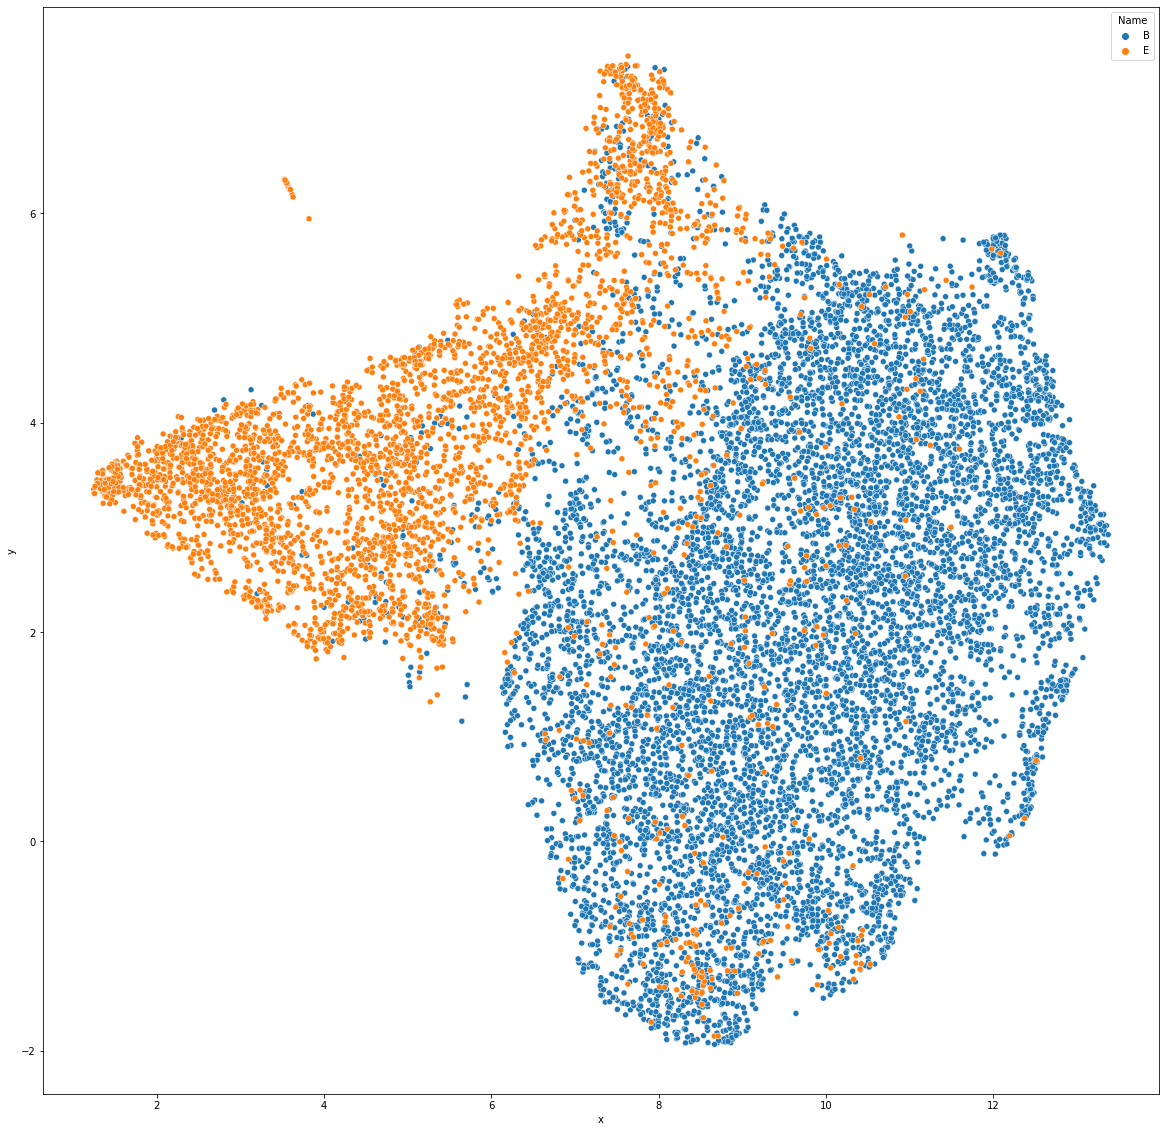

In [47]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x=UMAPData["x"], y=UMAPData["y"], hue=UMAPData.Name)
plt.savefig("UMAP_region_demo.png")

In [49]:
from sklearn.mixture import GaussianMixture as GMM     # 1. Choose the model class

model = GMM(n_components=2,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters　#BGMMではなくGMMを使ってしまっている！！
model.fit(embedding)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(embedding)        # 4. Determine cluster labels


In [50]:
y_gmm

array([0, 0, 0, ..., 1, 1, 0])

In [51]:
df["GMM_cluster"] = y_gmm + 1

<AxesSubplot:xlabel='x', ylabel='y'>

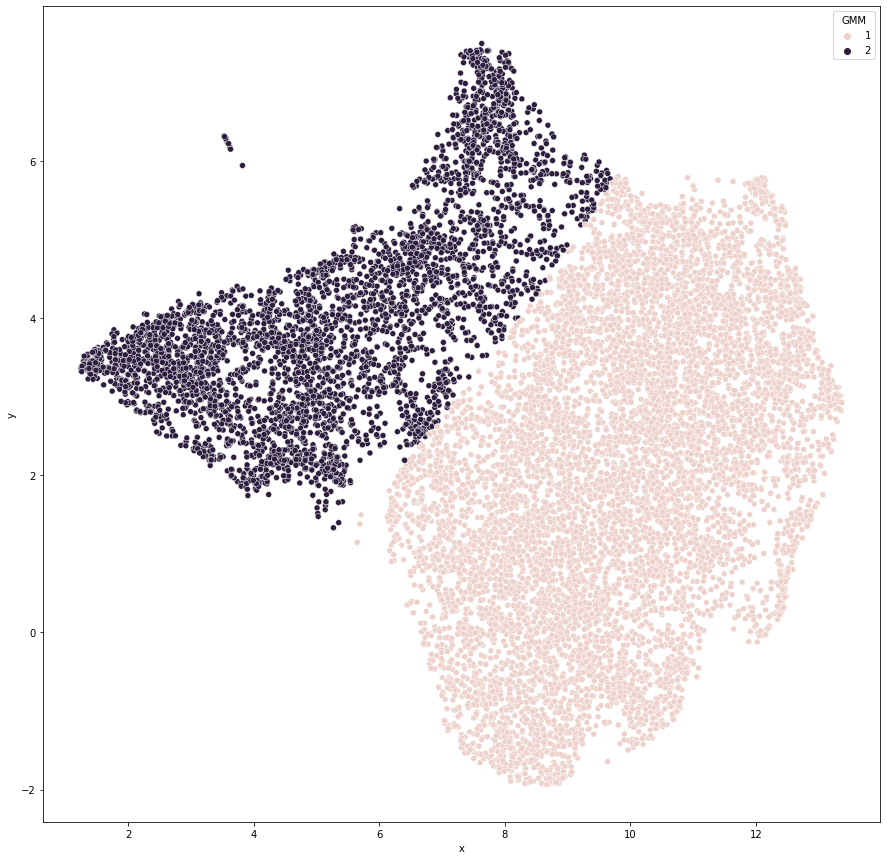

In [53]:
UMAPData["GMM"] = y_gmm + 1
plt.figure(figsize=(15, 15))
sns.scatterplot(x=UMAPData["x"], y=UMAPData["y"], hue=UMAPData["GMM"])